In [1]:
import numpy as np
import scipy.stats as stats
import sklearn
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Team Contract
#Decide one a Stakeholder
#EDA
#Plot, look into outliers,nulls
#Decide which predictors to use for the single model and the other model 


In [2]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
duplicated = df.duplicated(subset='id')


In [12]:
duplicated = df.loc[df.duplicated(subset='id') == True]
duplicated = duplicated.sort_values(by = 'id',axis = 0)
duplicated

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,NO,NONE,...,7 Average,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,NO,NONE,...,6 Low Average,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
11422,109200390,10/20/2014,250000.0,3,1.75,1480,3900,1.0,NO,NONE,...,7 Average,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
12406,123039336,12/8/2014,244900.0,1,1.00,620,8261,1.0,NO,NONE,...,5 Fair,620,0.0,1939,NaN,98106,47.5138,-122.364,1180,8244
7786,251300110,1/14/2015,358000.0,3,2.25,2510,12013,2.0,NO,NONE,...,8 Good,2510,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,9407110710,2/26/2015,322000.0,3,1.75,1510,8400,1.0,NO,NONE,...,7 Average,980,530.0,1979,0.0,98045,47.4476,-121.771,1500,10125
4918,9809000020,3/13/2015,1940000.0,5,2.25,3120,16672,2.0,NO,NONE,...,9 Better,3120,0.0,1969,0.0,98004,47.6458,-122.219,3740,17853
6340,9828200460,1/6/2015,430000.0,2,1.00,700,4800,1.0,NO,NONE,...,7 Average,700,0.0,1922,0.0,98122,47.6147,-122.300,1440,4800
15186,9834200305,2/10/2015,615000.0,3,1.00,1790,3876,1.5,NO,NONE,...,7 Average,1090,700.0,1904,0.0,98144,47.5750,-122.288,1360,4080


In [4]:
# exploratory
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [18]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


In [ ]:
#price most associated with sqft_living, sqft_above,sqft_living15,bathrooms

In [23]:
X = df['sqft_living']
X_cons = sm.add_constant(X)
model = sm.OLS(df['price'],X_cons).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:13:42   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [39]:
X = df.select_dtypes(include=['float','int64'])
X = X.drop(['price','yr_renovated','lat','long','zipcode'],axis=1)
X.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
sqft_above       0
yr_built         0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [40]:
X_cons = sm.add_constant(X)
model = sm.OLS(df['price'],X_cons).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     2855.
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:31:02   Log-Likelihood:            -2.9829e+05
No. Observations:               21597   AIC:                         5.966e+05
Df Residuals:                   21586   BIC:                         5.967e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.867e+06   1.36e+05     50.442      0.000     6.6e+06    7.13e+06
id            -1.509e-06   5.77e-07     -2.615      0.009   -2.64e-06   -3.78e-07
bedrooms      -6.605e+04   2226.407    -29.668      0.000   -7.04e+04   -6.17e+04
bathrooms      6.938e+04   3857.392     17.987      0.000    6.18e+04    7.69e+04
sqft_living     258.6183      4.980     51.927      0.000     248.856     268.380
sqft_lot          0.0127      0.057      0.223      0.824      -0.099       0.125
floors         5.942e+04   4163.005     14.272      0.000    5.13e+04    6.76e+04
sqft_above      -10.4273      4.957     -2.104      0.035     -20.143      -0.711
yr_built      -3565.9339     70.783    -50.379      0.000   -3704.673   -3427.195
sqft_living15    93.5036      3.809     24.546      0.000      86.037     100.970
sqft_lot15       -0.7137      0.088     -8.150      0.000      -0.885      -0.542
==============================================================================
Omnibus:                    15561.018   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           730260.907
Skew:                           2.956   Prob(JB):                         0.00
Kurtosis:                      30.867   Cond. No.                     4.49e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Here we see that sqft_lot is insignificant, and we see that we need to drop id

In [41]:
X = X.drop('id',axis=1)
X_cons = sm.add_constant(X)
model = sm.OLS(df['price'],X_cons).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     3170.
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:36:38   Log-Likelihood:            -2.9829e+05
No. Observations:               21597   AIC:                         5.966e+05
Df Residuals:                   21587   BIC:                         5.967e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.868e+06   1.36e+05     50.442      0.000     6.6e+06    7.13e+06
bedrooms      -6.604e+04   2226.704    -29.659      0.000   -7.04e+04   -6.17e+04
bathrooms      6.939e+04   3857.912     17.987      0.000    6.18e+04     7.7e+04
sqft_living     258.6360      4.981     51.924      0.000     248.873     268.399
sqft_lot          0.0198      0.057      0.345      0.730      -0.092       0.132
floors          5.94e+04   4163.564     14.267      0.000    5.12e+04    6.76e+04
sqft_above      -10.4122      4.958     -2.100      0.036     -20.129      -0.695
yr_built      -3570.0058     70.775    -50.442      0.000   -3708.730   -3431.281
sqft_living15    93.3651      3.810     24.508      0.000      85.898     100.832
sqft_lot15       -0.6986      0.087     -7.994      0.000      -0.870      -0.527
==============================================================================
Omnibus:                    15547.556   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           726071.715
Skew:                           2.954   Prob(JB):                         0.00
Kurtosis:                      30.784   Cond. No.                     4.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# we will need to remove the bedrooms outliers later on, because they are skewing our data

In [43]:
df.loc[df['bedrooms'] > 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,NO,NONE,...,7 Average,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [44]:
# as you can see, there are two outliers that are greater than 10

In [45]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Text(0.5, 1.0, "Frequency of Popular Movie's Runtimes")

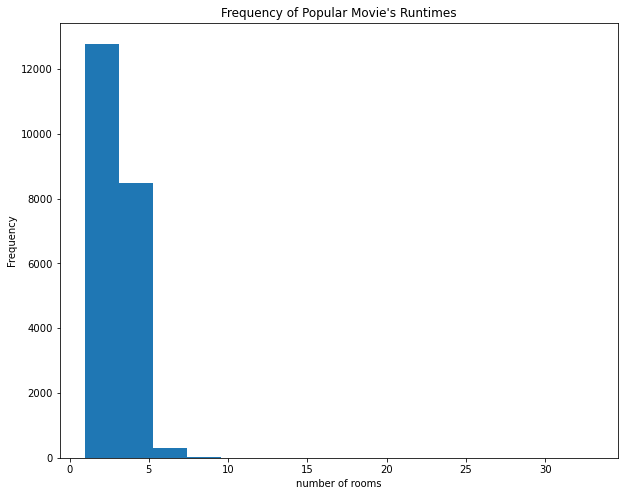

In [54]:
x = df['bedrooms']

fig, ax = plt.subplots(figsize=(10,8))

ax.hist(x, bins=15)
ax.set_xlabel('number of rooms')
ax.set_ylabel('Frequency')
ax.set_title("Frequency of Popular Movie's Runtimes")



In [61]:
# dropping bedroom rows with values >=7
X_num = df.select_dtypes(include=['float','int64'])
df_bedrooms = X_num.loc[(X_num['bedrooms'] < 6) & (X_num['bedrooms'] > 1)]
y = df_bedrooms['price']
df_bedrooms = df_bedrooms.drop(['price','yr_renovated','lat','long','zipcode','id'],axis=1)
df_bed_cons = sm.add_constant(df_bedrooms)
model_1 = sm.OLS(endog=y,exog=df_bed_cons).fit()
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     3051.
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:53:20   Log-Likelihood:            -2.9036e+05
No. Observations:               21067   AIC:                         5.807e+05
Df Residuals:                   21057   BIC:                         5.808e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.784e+06   1.36e+05     49.955      0.000    6.52e+06    7.05e+06
bedrooms      -7.421e+04   2528.838    -29.347      0.000   -7.92e+04   -6.93e+04
bathrooms       7.08e+04   3866.530     18.310      0.000    6.32e+04    7.84e+04
sqft_living     257.2745      4.999     51.466      0.000     247.476     267.073
sqft_lot          0.0414      0.056      0.739      0.460      -0.068       0.151
floors         5.917e+04   4107.587     14.404      0.000    5.11e+04    6.72e+04
sqft_above      -13.6665      4.932     -2.771      0.006     -23.333      -4.000
yr_built      -3513.2334     70.615    -49.752      0.000   -3651.644   -3374.823
sqft_living15    95.7083      3.801     25.178      0.000      88.257     103.159
sqft_lot15       -0.6786      0.086     -7.868      0.000      -0.848      -0.510
==============================================================================
Omnibus:                    13867.415   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           462656.497
Skew:                           2.684   Prob(JB):                         0.00
Kurtosis:                      25.322   Cond. No.                     4.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""